# Regresión lineal


### Contenido
* [Introducción](#Introducción)
* [Historia](#Historia)
* [Planteamiento del algoritmo](#Planteamiento-del-algoritmo)
* [Ejemplo](#Ejemplo)
* [Conclusiones](#Conclusiones)

## Introducción

Muchas veces en la práctica es necesario analizar una variable para conocer su comportamiento: su media, varianza o cualquier otra medida de posición o dispersión; se puede trazar un histograma, por ejemplo, para ver de manera gráfica su comportamiento y la información transmite. Pero ¿qué pasa si el comportamiento de una variable influye en el comportamiento de otra?. Es posible analizar las variables por separado, pero se puede hacer un análisis más completo si se explica la relación que hay entre dos o más variables. 

A partir del diagrama de dispersión a menudo es posible visualizar una curva que se aproxime a los datos. Esta curva se conocer como *curva de aproximación*. Si tal curva es una línea recta, decimos entonces que existe una relación lineal entre las variables. Teniendo en cuenta lo anterior, la regresión inea les un modelo matemáticos que aproxima la relación que hay entre una o más variables independientes y una variable depediente, y que además tienen una relación lineal. 

En la siguiente figura vemos un ejemplo vemos un ejemplo ddos diagraas de dispersión donde uno muestra una relación lineal y otro muestra una relación no lineal.

![Figura 1](fig-5-1.jpg)
Fuente:https://fisicamatematic.wordpress.com/2011/11/04/minimos-cuadrados/ 


## Historia

La primera forma de regresión lineal documentada fue el [método de los mínimos cuadrados](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados). Publicada en 1805 por [Legendre](https://es.wikipedia.org/wiki/Adrien-Marie_Legendre) la cua nos dice:
>Mínimos cuadrados es una técnica de análisis numérico enmarcada dentro de la optimización matemática, en la que, dados un conjunto de pares ordenados —variable independiente, variable dependiente— y una familia de funciones, se intenta encontrar la función continua, dentro de dicha familia, que mejor se aproxime a los datos (un "mejor ajuste"), de acuerdo con el criterio de 
*mínimo error* cuadrático. Fuente:https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados

También Gass desarrolló más a fondo el método de mínimos cuadrados  e incluyó una versión del [teorema de Gauss-Márkov.](https://es.wikipedia.org/wiki/Teorema_de_Gauss-M%C3%A1rkov)

El término *regresión* fue utilizado por primera vez en el estudio de variables antropométricas donde comparabas la atura de padres e hijos. Dicho estudio comparó la estatura de padres e hijos y resultó qur los hijos cuyos padres tenían una altuya mucho más alta que el promedio, tendían a igualarlo, mientras que aquellos cuyos padres eran mucho más bajos, regresaban a la altuta promedio. 

![Figura 2](s-xmGihesQyzPh2E3Cn78WnXHbDZP.jpg)



## Planteamiento del algoritmo

El modelo relaciona $m$ variables iregresoras $X_j$ con $j=1,2,...,m$ (variables independientes) con  la variables dependiente $Y$ de la siguiente manera:
$$
Y= \beta_0 + \beta_1 X_1 + ... + \beta_m X_m + \epsilon = \beta_0 + \sum_{j=1}^{m}\beta_jX_j+\epsilon
$$

Donde $\epsilon$ es una variable aleatoria que representa el error, dado ue hay factores de la realidad que no son controlables y observables. 

Tambíen se tiene la *correlación* $r^{2}$, la cual determina la correlación de las rectas y la caidad del ajuste. Si $r^{2}$ es cercano o igual a 1, el ajuste se considera bueno y las predicciones realizadas a partir del modelo serán fiables. Esto quiere decir que el modelo obtenidp es verdaderamente representativo. Si $r^{2}$ es cercano o igual a cero, el ajuste se considera malo y no el modelo no realiza predicciones confiables.

## Ejemplo

A continuación se presenta un ejemplo de regresión lineal usando una base de datos de IMDB que recopila información variada de películas desde el 2006 hasta el 2016. 

In [132]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
regr=linear_model.LinearRegression()
pd.read_csv('IMDB-Movie-Data.csv')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


Después de importar la base de datos, se depura. Esto es eliminar aquellos registros con valores nulos

In [121]:
datos=pd.read_csv('IMDB-Movie-Data.csv')
dataFrame=pd.DataFrame(datos)
df=dataFrame.dropna()

El objetivo de esta regresión lineal es ver si hay una relación entre los votos que recibe cada películas y su calificación en IMDB. Por lo tanto la variable independiente $x$ será el número de votos de cada película y la variable dependiente $y$ será la calificación de IMDB.

Para esto, se convierten las columnas de nuestro interés en arreglos para trabajar con ellos.

In [122]:
x=df['Votes']
y=df['Metascore']
print(type(x))

<class 'pandas.core.series.Series'>


In [123]:
xx=np.array(x)
Y=np.array(y)
print(type(xx),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [127]:
X=xx[:,np.newaxis]
print(len(X),len(Y))

838 838


In [138]:
print(regr.fit(X,Y))
print(regr.coef_)
m=regr.coef_[0]
b=regr.intercept_
y_p=m*X+b #valor que se predice
print('y={0}*x+{1}'.format(m,b))
print('El coeficiente de correlación es',r2_score(Y,y_p))

LinearRegression()
[2.92058772e-05]
y=2.9205877230231454e-05*x+53.93171998666861
El coeficiente de correlación es 0.11067189731740046


El modelo queda de la forma
$$
y=2.92e-5x + 53.93
$$
donde el coeficiente de correlación es $r^{2}= 0.11067$

Veamos si se puede predecir algún valor de $y$:

In [136]:
print(regr.predict(X)[0:5])

[76.04273028 68.12051926 58.53474147 55.69998982 65.43086241]


Ahora veamos de manera gráfica nuestro modelo

In [137]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Metascore')

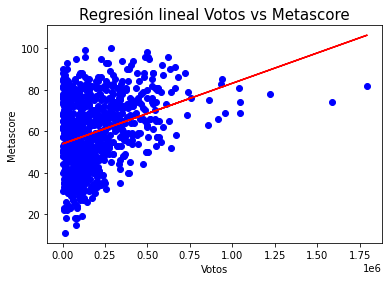

In [139]:
plt.scatter(X,Y,color='blue')
plt.plot(X,y_p,color='red')
plt.title('Regresión lineal Votos vs Metascore', fontsize=15)
plt.xlabel('Votos',fontsize=10)
plt.ylabel('Metascore',fontsize=10)

Ya obtenido el modelo, la gráfica y el coeficiente de correlación, vemos que no existe una relación significativa entre ambas variables. El diagrama de dispersíón vs la recta de nuestro modelo están bastante alejadas, y si bien se observa que muchas películas que tienen muchos votos tienen mayor puntuación, no existe necesariamente una relación entre ambas variables, por lo tanto no es un modelo predictivo de calidad. 

## Conclusiones

La importancia de este modelo matemático se ve en la poca limitación que hay en cuanto a qué variables se puedes comparar, ya que puede ser un modelo bivariado, multivariado; se pueden utilizar variables continuas y discretas; además puede aplicarse en cualquier campo para determinar si existe relación entre las variables de interés y poder realizar predicciones de calidad. 